<a href="https://colab.research.google.com/github/rahuldevkar5/Data_Science/blob/main/Forecasting_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
cocacola.interpolate(inplace = True)


In [2]:
cocacola=pd.read_csv('/content/CocaCola_Sales_Rawdata.csv')
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
cocacola.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [4]:
cocacola['Quarters']= 0
cocacola['Year'] = 0
for i in range(42):
    p = cocacola["Quarter"][i]
    cocacola['Quarters'][i]= p[0:2]
    cocacola['Year'][i]= p[3:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# Prepring dummies 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(cocacola['Quarters']))
cocacola = pd.concat([cocacola,Quarters_Dummies],axis = 1)
cocacola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [6]:
cocacola["t"]=np.arange(1,43)

In [7]:
cocacola.describe()

,Sales,Year,Q1,Q2,Q3,Q4,t
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2994.353308,90.761905,0.261905,0.261905,0.238095,0.238095,21.500000
std,977.930896,3.074756,0.445001,0.445001,0.431081,0.431081,12.267844
min,1547.818996,86.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2159.714246,88.000000,0.000000,0.000000,0.000000,0.000000,11.250000
50%,2782.376999,91.000000,0.000000,0.000000,0.000000,0.000000,21.500000
75%,3609.250000,93.000000,0.750000,0.750000,0.000000,0.000000,31.750000
max,5253.000000,96.000000,1.000000,1.000000,1.000000,1.000000,42.000000


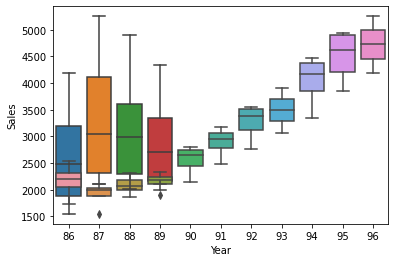

In [8]:
#boxplot
sns.boxplot(x="Quarters",y="Sales",data=cocacola)
sns.boxplot(x="Year",y="Sales",data=cocacola)

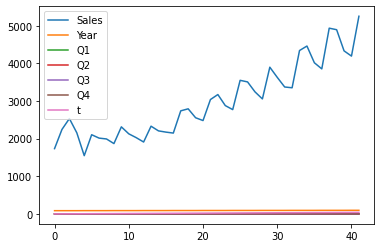

In [9]:
cocacola.plot()

This above graph is seasonal and non stationary

## ACF plot and PACF plot

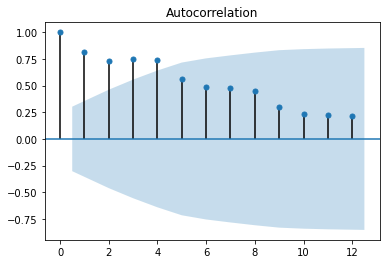

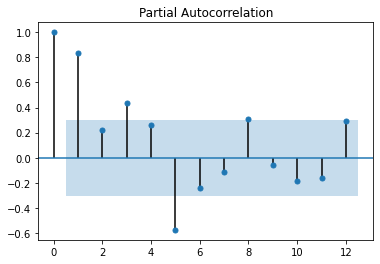

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=12)
tsa_plots.plot_pacf(cocacola.Sales,lags=12)
plt.show()

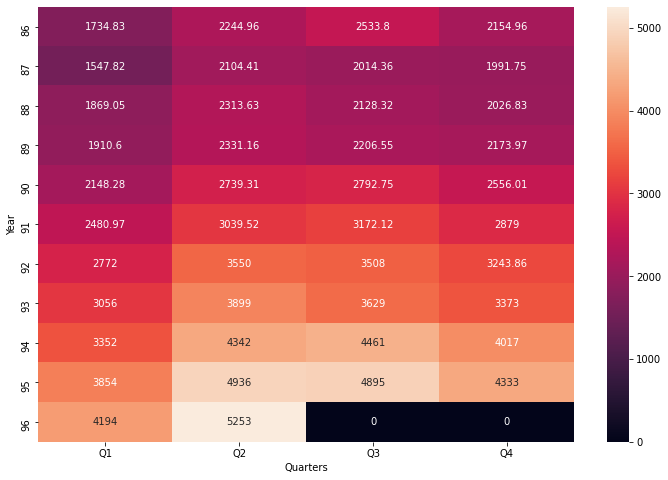

In [11]:
#Heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cocacola,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

## Train Test Split


In [19]:
Train = cocacola.head(36)
Test = cocacola.tail(5)

## Model Building

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [21]:
#MAPE
def MAPE(pred,org):
    temp =np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [22]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

19.460039575826382

## Holt Method

In [23]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

9.3265706624251

## Holts winter exponential smoothing with additive seasonality and additive trend

In [24]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


4.575650856307709

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [25]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


3.5972715575881566

## Final Model by combining train and test

In [26]:
hwe_model_add_add = ExponentialSmoothing(cocacola["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
hwe_model_add_add.forecast(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


42    4944.455880
43    4760.824936
44    4794.885955
45    5679.607827
46    5708.234650
47    5275.603235
48    5156.169958
49    6126.061343
50    5998.836745
51    5520.530408
dtype: float64